This is going to be for a series of LinkedIn and/or blog posts. I'll eventually share the links and texts for the posts. Here's my overall plan:

1. Machine learning is optimization - why do gradients matter?
- minimizing loss is the goal of ML
- minimizing loss without using gradients is (usually) incredibly inefficient
- example of gradient descent in action
- tease Bayesian models

2. Bayesian models are sampling - why?
- Traditional ML finds best set of parameters. Bayes infers a distribution of plausible parameters
- How do we get these samples?
- Importance of formulating the model of the real world (DAG-like)
- tease sampling/gradients

3. Hamiltonian Monte Carlo
- Metropolis sampling ~ optimizing without gradients
- HMC sampling ~ using gradients
- animation of different sampling methods

4. Resources



# Zeroth Post (teaser)

How do you build a model - optimization or sampling? 

This question isn't quite as non-sensical as it seems! Over the next few posts I'll make my case as to why.
* Machine learning is really just optimization
* Bayesian models (usually) need sampling, which ends up being analogous to ML's optimization
* The same principles improve both traditional ML and Bayesian models

Follow along for obvious tautologies, controversial takes, and of course a few nerdy jokes! 

#MLBayes Post 1

Optimization is the root of machine learning. This isn't new, I first heard it from @rr and he probably heard it from someone else. 

But its true. Regardless of the algorithm, ML is about minimizing some loss function. 

And if we're minimizing? We're optimizing! 

There are a number of ways to do that - and it's sometimes overwhelming to think about. We often rely on packages that do all of this behind the scenes, but its worth having a basic understanding of what's happening. 

The plot below shows a simple loss function where there's a single parameter, x. 

So what value of our parameter will minimize our loss function? If we just start guessing, we're going to have to make a lot of guesses before we have a good idea. 

But if we just look at the plot of the loss function, we can see something nice: curves! Nice bendy boys, curving down to an obvious minimum. 

So if we pick a value for our parameter, we can calculate:
1. The loss (how bad is this choice?)
2. The gradient (which way will reduce our loss?)

This helps inform the next value we choose, and we can make smart guesses, down until we find the minimum!

Now, it doesn't come for free. We have to calculate the gradient. In this example its easy, but for many parameters and complicated loss functions it can get difficult. But it's almost always better to know the gradient! The cost of caluclating (in terms of time/energy) are small compared to the benefit it gives in finding the miniumum. 

Using gradients to find the parameters that minimize a loss function. That's what machine learning is! Whether deep learning with fancy neural networks or your **GRADIENT** boosted learners. It's optimization all the way down! 

Which is why @ss/adj claim how important optimization is for ML! And why an organization like INFORMS is so great for data scientists.

But what about Bayesians? A different flavor of model altogher? Are there any gradients for us?

Stay tuned!

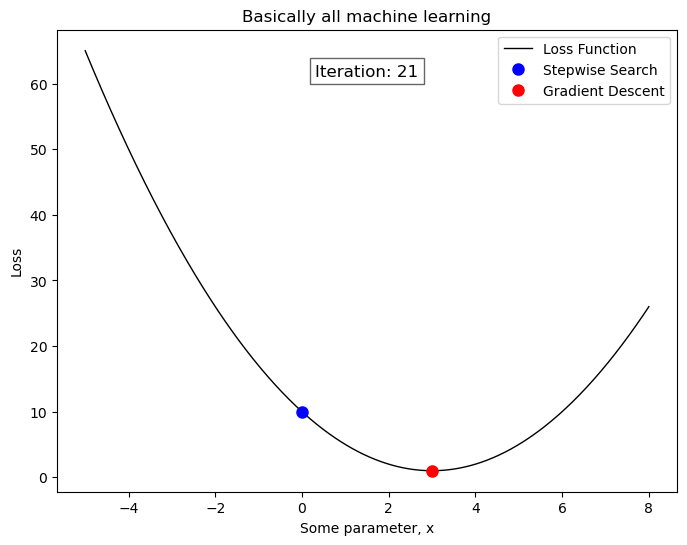

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
matplotlib.rcParams["animation.ffmpeg_path"] = "C:\\Users\\ytsop\\anaconda3\\Library\\bin\\ffmpeg.exe"


# Define the loss function
def loss_function(x):
    return (x - 3)**2 + 1  # Simple quadratic function

# Gradient of the loss function
def gradient(x):
    return 2 * (x - 3)  # Derivative of the loss function

# Let's try some bendier boys:
# Define the new loss function (4th order polynomial)
#def loss_function(x):
#    return (x**4) - (2 * (x**3)) + 3  # More curvature, but still convex

# Compute the gradient (derivative)
#def gradient(x):
#    return 4 * (x ** 3) - (6 * (x ** 2))  # Derivative of the loss function

# Create x values for plotting
x_vals = np.linspace(-5, 8, 400)
y_vals = loss_function(x_vals)

# Set up figure
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, y_vals, label="Loss Function", color="black", linewidth=1)
ax.set_xlabel("Some parameter, x")
ax.set_ylabel("Loss")
ax.set_title("Basically all machine learning")
# Create a text annotation for the iteration counter
iteration_text = ax.text(0.5, 0.9, '', transform=ax.transAxes, fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.6))


# --------- Stepwise Search (Non-Gradient) ---------
stepwise_steps = [-4]  # Start point
step_size = 0.2
direction = 1  # Start moving left

for _ in range(20):  # Take 15 steps
    current_x = stepwise_steps[-1]
    new_x = current_x + step_size * direction
    new_loss = loss_function(new_x)
    
    # Check if the new step improves the loss
    if new_loss < loss_function(current_x):
        # Keep moving in the same direction
        stepwise_steps.append(new_x)
    else:
        # Reverse direction if loss increased
        direction *= -1
        new_x = current_x + step_size * direction
        stepwise_steps.append(new_x)

stepwise_steps = np.array(stepwise_steps)
stepwise_losses = loss_function(stepwise_steps)

# --------- Gradient Descent ---------
gradient_steps = [-4]  # Same start point
learning_rate = 0.2

for _ in range(20):
    current_x = gradient_steps[-1]
    new_x = current_x - learning_rate * gradient(current_x)
    gradient_steps.append(new_x)

gradient_steps = np.array(gradient_steps)
gradient_losses = loss_function(gradient_steps)

# --------- Animation Setup ---------
stepwise_point, = ax.plot([], [], 'bo', markersize=8, label="Stepwise Search")  # Blue for Stepwise
gradient_point, = ax.plot([], [], 'ro', markersize=8, label="Gradient Descent")  # Red for Gradient

def update(frame):
    stepwise_x, stepwise_y = stepwise_steps[min(frame, len(stepwise_steps)-1)], stepwise_losses[min(frame, len(stepwise_steps)-1)]
    gradient_x, gradient_y = gradient_steps[min(frame, len(gradient_steps)-1)], gradient_losses[min(frame, len(gradient_steps)-1)]
    
    stepwise_point.set_data([stepwise_x], [stepwise_y])
    gradient_point.set_data([gradient_x], [gradient_y])

    # Update iteration text
    iteration_text.set_text(f"Iteration: {frame + 1}")

    return stepwise_point, gradient_point, iteration_text

# Add legend
ax.legend()

# Animate both methods simultaneously
#ani = animation.FuncAnimation(fig, update, frames=max(len(stepwise_steps), len(gradient_steps)), interval=500, blit=True)

# Save animation
#fig.set_size_inches(10, 10)  # Increase figure size before saving
#ani.save("optimization_comparison.mp4", writer="ffmpeg", fps=10, bitrate=20000)

#plt.show()

from itertools import chain

# Extend the animation frames to repeat 3 times
loop_count = 3  # Change this to however many times you want the animation to repeat
total_frames = list(chain.from_iterable([range(len(stepwise_steps))] * loop_count))

ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=500, blit=True)
fig.set_size_inches(8, 6)
ani.save("optimization_animation.mp4", writer="ffmpeg", fps=5, bitrate=5000)


#MLBayes Post 2

Optimization is the backbone of machine learning (see post 1: [link]), but what about Bayesian models?

Are they different? And is optimization still important?

With machine learning, we're looking for the BEST parameters. The ones that minimize our loss function. Easy peasy. Find the best, move along.

With Bayes, we getting greedy. We want to know ALL the possible parameters!

But some parameter values fit the data better than others. Some fit our model of the world better. 

And Bayesian models don't just give one answer - they give a probability distribution over parameters. 

If we're lucky and our posterior is a nice simple Gaussian, then we just calculate it directly. But in the real world, the math ain't so simple. So...sample!

Bayes Theorm gives us a way to combine:
Our prior beliefs (what the parameters could be)
Likelihood (how well the parameters explain the observed data)

And the result is a posterior distribution.

With Markov Chain Monte Carlo (MCMC) we can iteratively sample from this posterior distribution. So even though we can't usually calculate it directly, if we take enough samples, we can estimate the full distribution.

But remember how bad ML sucks when you randomly guess parameters and then check the loss? If MCMC is just randomly guessing parameter values and calculating probabilityes, it's also going to be brutally iniefficient. Even brutalier, actually. 

So how did MCMC improve?

The same way ML did! Stay tuned. 

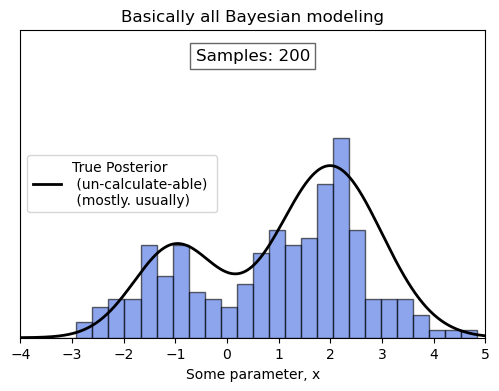

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

# Set random seed for reproducibility
np.random.seed(42)

# Define the true posterior distribution (e.g., a skewed normal)
from scipy.stats import norm
true_posterior = lambda x: 0.3 * norm.pdf(x, loc=-1, scale=0.8) + 0.7 * norm.pdf(x, loc=2, scale=1.0)

# Generate x values for plotting
x_vals = np.linspace(-4, 5, 500)
y_vals = true_posterior(x_vals)

# Generate random samples (simulating MCMC sampling)
num_samples = 200  # Total samples
samples = np.concatenate([
    np.random.normal(loc=-1, scale=0.8, size=int(0.3 * num_samples)),  # Samples from first peak
    np.random.normal(loc=2, scale=1.0, size=int(0.7 * num_samples))  # Samples from second peak
])
np.random.shuffle(samples)  # Mix the samples

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_vals, y_vals * num_samples * 0.4, color='black', lw=2, label="True Posterior \n (un-calculate-able) \n (mostly. usually)")

# Adjust limits (Fix y-axis upper limit)
ax.set_xlim(-4, 5)
ax.set_ylim(0, num_samples * 0.2)  # **Max set to num_samples * max density area**
ax.set_xlabel("Some parameter, x")
ax.set_yticks([])  # Remove y-axis ticks
ax.set_ylabel("")  # Remove y-axis label

ax.set_title("Basically all Bayesian modeling")
ax.legend()

# Define histogram bins
bins = np.linspace(-4, 5, 30)
counts = np.zeros(len(bins) - 1)  # Start with zero samples in each bin
bar_container = ax.bar(bins[:-1], counts, width=np.diff(bins), color="royalblue", edgecolor="black", alpha=0.6)

# Add sample counter at the top center
sample_text = ax.text(0.5, 0.9, 'Samples: 0', transform=ax.transAxes,
                      fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.6))

def update(frame):
    """Update function for animation - adds one new sample at a time."""
    global counts
    
    # Find which bin the new sample falls into & increment count
    bin_idx = np.digitize(samples[frame], bins) - 1  # Adjust index to fit histogram bins
    if 0 <= bin_idx < len(counts):
        counts[bin_idx] += 1  # **Use raw counts instead of normalizing**
    
    # Update bar heights
    for rect, new_height in zip(bar_container, counts):
        rect.set_height(new_height)

        # Update sample counter text
    sample_text.set_text(f"Samples: {frame + 1}")
    
    return bar_container, sample_text

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_samples, interval=50, blit=False)

# Save as MP4
ani.save("posterior_approximation.mp4", writer="ffmpeg", fps=20, bitrate=5000)

plt.show()


#MLBayes Post 3

Feels like I've probably already given away the punchline, but Bayesian models can use gradients too!

Traditional ML models use optimization to find the best parameters. And optimization is way more efficient when we use gradients. 

Bayesian models don't optimize, they sample. We're trying to estimate an incalculable distribution, not just a single best value. 

ML has a loss function, and taking derivatives tells us where to step next.

Bayesian models give us a distribution, not some neat equation we can just dy/dx.

So, how to gradient??

Enter Hamiltonian Monte Carlo (HMC) :nuts:
HMC borrows from physics to sample a space way more efficiently. 

Older MCMC methods (like Metropolis) sample slowly and conservatively, tiptoing around the posterior. Especially slow in high dimensions.
But with Hamiltonian dynamics, we sample a probability AND momentum (which is physics for gradient).
This tells us where to sample next, making our sampling much more efficient.

Loss function gradients = faster ML training
Posterior gradients = faster Bayesian sampling

The animation below shows the difference in a simple example (code adapted from @Thomas - thanks!)

Want to go deeper? Here's a great paper! - https://arxiv.org/pdf/1701.02434
Want to read a fun parable about HMC and King Monty? Richard McElreath's Statistical Rethinking has it (and everything else) 

And of course, the joke:
Metropolis says to Hamiltonian: "I used to think that using momentum was crazy, but now I can see it's NUTS!" 


In [8]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set random seed
np.random.seed(755)

# Generate linear data
size = 50
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
y = true_intercept + x * true_slope + np.random.normal(scale=0.5, size=size)

data = pd.DataFrame({"x": x, "y": y})

In [11]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10)
    intercept = pm.Normal("Intercept", 0, sigma=10)
    slope = pm.Normal("slope", 0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference
    idata = pm.sample(1000)
    


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


In [14]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10)
    intercept = pm.Normal("Intercept", 0, sigma=10)
    slope = pm.Normal("slope", 0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference
    idata_m = pm.sample(1000, step=pm.Metropolis())
    


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [Intercept]
>Metropolis: [slope]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [23]:
metropolis_intercept = idata_m.posterior["Intercept"].values.flatten()
metropolis_slope = idata_m.posterior["slope"].values.flatten()

nuts_intercept = idata.posterior["Intercept"].values.flatten()
nuts_slope = idata.posterior["slope"].values.flatten()

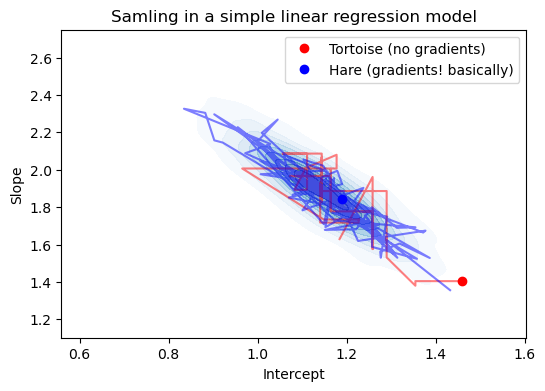

In [32]:
import seaborn as sns

# Set up figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot KDE for posterior distribution (ONLY from NUTS samples)
sns.kdeplot(x=nuts_intercept, y=nuts_slope, fill=True, cmap="Blues", alpha=0.5, ax=ax)

# Mark the true values
# ax.scatter([true_intercept], [true_slope], color="black", marker="x", s=100, label="True Values")

ax.set_xlim(min(nuts_intercept.min(), nuts_intercept.max()) - 0.1, 
            max(nuts_intercept.min(), nuts_intercept.max()) + 0.1)
ax.set_ylim(min(nuts_slope.min(), nuts_slope.max()) - 0.1, 
            max(nuts_slope.min(), nuts_slope.max()) + 0.1)

ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_title("Samling in a simple linear regression model")

# Initialize paths
metropolis_line, = ax.plot([], [], "r-", alpha=0.5)
nuts_line, = ax.plot([], [], "b-", alpha=0.5)

# Initialize points
metropolis_point, = ax.plot([], [], "ro", markersize=6, label="Tortoise (no gradients)")
nuts_point, = ax.plot([], [], "bo", markersize=6, label="Hare (gradients! basically)")

# Add legend
ax.legend()

# Store history dynamically
metropolis_history = []
nuts_history = []

def update(frame):
    """Update function for animation - shows sampling path dynamically."""
    metropolis_history.append((metropolis_intercept[frame], metropolis_slope[frame]))
    nuts_history.append((nuts_intercept[frame], nuts_slope[frame]))

    met_x, met_y = zip(*metropolis_history)
    nuts_x, nuts_y = zip(*nuts_history)

    metropolis_line.set_data(met_x, met_y)
    nuts_line.set_data(nuts_x, nuts_y)

    metropolis_point.set_data([metropolis_intercept[frame]], [metropolis_slope[frame]])
    nuts_point.set_data([nuts_intercept[frame]], [nuts_slope[frame]])

    return metropolis_line, nuts_line, metropolis_point, nuts_point

# **Limit animation for testing**
ani = animation.FuncAnimation(fig, update, frames=100, interval=500, blit=True)

# Save as MP4
ani.save("metropolis_vs_hmc_regression.mp4", writer="ffmpeg", fps=5, bitrate=5000)

plt.show()
